In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Book1.csv")
df.head()

,Name,Age,Incom($)
0,Rob,27,70000
1,Michel,29,90000
2,Ismail,29,61000
3,Kory,28,60000
4,Gautom,42,150000


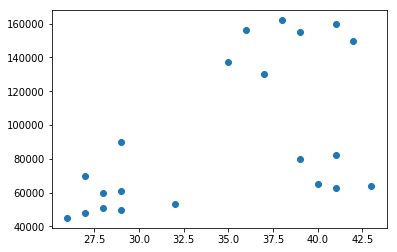

In [6]:
plt.scatter(df['Age'],df['Incom($)'])

In [7]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
y_predicted = km.fit_predict(df[['Age',"Incom($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2])

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Incom($),cluster
0,Rob,27,70000,2
1,Michel,29,90000,2
2,Ismail,29,61000,0
3,Kory,28,60000,0
4,Gautom,42,150000,1


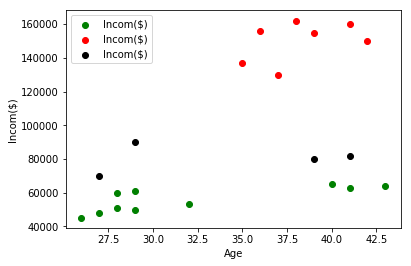

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Incom($)'],color = 'green')
plt.scatter(df2.Age,df2['Incom($)'],color = 'red')
plt.scatter(df3.Age,df3['Incom($)'],color = 'black')

plt.xlabel("Age")
plt.ylabel("Incom($)")
plt.legend()

In [31]:
scaler = MinMaxScaler()
scaler.fit(df[['Incom($)']])
df['Incom($)'] = scaler.transform(df['Incom($)'].values.reshape(-1,1))

scaler.fit(df.Age.values.reshape(-1,1))
df.Age = scaler.transform(df.Age.values.reshape(-1,1))

df

,Name,Age,Incom($),cluster
0,Rob,0.058824,0.213675,2
1,Michel,0.176471,0.384615,2
2,Ismail,0.176471,0.136752,0
3,Kory,0.117647,0.128205,0
4,Gautom,0.941176,0.897436,1
5,David,0.764706,0.940171,1
6,Andrea,0.882353,0.982906,1
7,Bead,0.705882,1.000000,1
8,Angelina,0.588235,0.948718,1
9,Donald,0.647059,0.726496,1


In [32]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[["Age","Incom($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2])

In [33]:
df['cluster'] = y_predicted

df

,Name,Age,Incom($),cluster
0,Rob,0.058824,0.213675,0
1,Michel,0.176471,0.384615,0
2,Ismail,0.176471,0.136752,0
3,Kory,0.117647,0.128205,0
4,Gautom,0.941176,0.897436,1
5,David,0.764706,0.940171,1
6,Andrea,0.882353,0.982906,1
7,Bead,0.705882,1.000000,1
8,Angelina,0.588235,0.948718,1
9,Donald,0.647059,0.726496,1


In [37]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.87058824, 0.22051282]])

In [39]:
km.cluster_centers_[:,1]

array([0.11633428, 0.8974359 , 0.22051282])

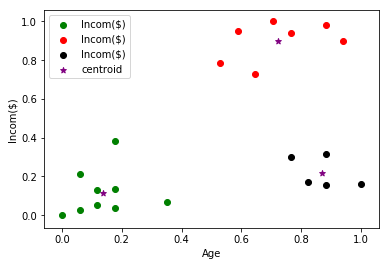

In [36]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Incom($)'],color = 'green')
plt.scatter(df2.Age,df2['Incom($)'],color = 'red')
plt.scatter(df3.Age,df3['Incom($)'],color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker="*",label='centroid')


plt.xlabel("Age")
plt.ylabel("Incom($)")
plt.legend()

In [40]:
# ELBOW TECHNIQUE

k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Incom($)']])
    sse.append(km.inertia_)

In [41]:
sse

[5.290123318366893,
 1.8560506336608231,
 0.4557618442849962,
 0.3297882038716432,
 0.24286277066420803,
 0.19123828438441162,
 0.15909024374296601,
 0.12158930532374175,
 0.08887331913423945]

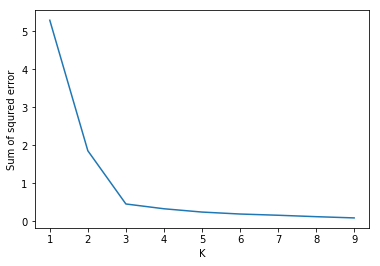

In [42]:
plt.xlabel('K')
plt.ylabel('Sum of squred error')
plt.plot(k_rng,sse)